<a href="https://colab.research.google.com/github/yumeniown/Software-Engineering-IT-Leaders-of-the-Future/blob/main/Word_Embeddings_3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Детекция изображений


Даны классы объектов, которые мы хотим сегментировать. Например, пусть мы хотим
научиться детектировать пять видов объектов:
1. человек;
2. сумка;
3. растительность;
4. дорога;
5. здания.

На вход нейросети подается RGB картинка (так же, как и в задаче классификации). На выходе нейросеть выдает набор пар (класс, координаты bounding box).

(собака, [35, 12], [64, 56]);

(кошка, [16, 45], [33, 54]);

…

Координата каждого bounding box — это пара [x1, y1], [x2, y2], где [x1, y1] —
координаты левого верхнего угла bounding box'а, [x2, y2] — координаты
правого нижнего угла bounding box'а.

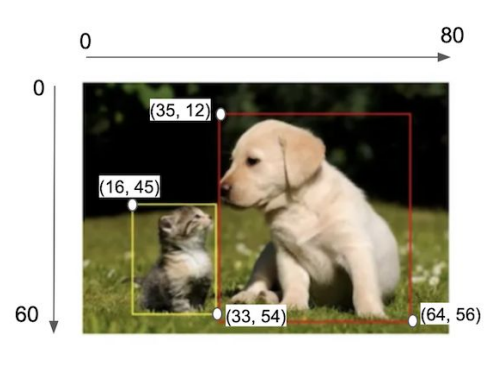

Иногда координаты bounding box'ов кодируют по-другому: парой [x1, y1], [w,
h], где [x1, y1] — координаты левого верхнего угла bounding box'а, [w, h] —
ширина и длина bounding box'а:

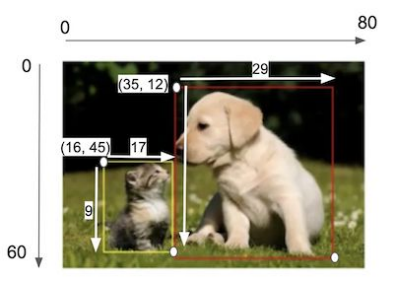

**Детекция объектов на изображениях** — это одна из ключевых задач компьютерного зрения, целью которой является не только классификация объектов на изображении, но и точное определение их местоположения. В отличие от задачи классификации, где модель определяет, что находится на изображении, детекция объектов включает в себя два аспекта:
1. **Классификация**: Определение класса объектов (например, "собака", "машина").
2. **Локализация**: Определение координат объектов с помощью ограничивающих рамок (bounding boxes).

### Задачи детекции объектов

1. **Классификация** — выявление, какие объекты присутствуют на изображении.
2. **Локализация** — указание местоположения объектов на изображении.
3. **Множественные объекты** — задача становится сложнее, когда на одном изображении может быть несколько объектов, принадлежащих к разным классам.
4. **Разнообразие размеров и масштабов** — объекты могут быть разных размеров и расположены под разными углами, что усложняет детекцию.

### Как работает детекция объектов?

Процесс детекции объектов состоит из следующих этапов:

1. **Подготовка данных**:
   - Для обучения моделей детекции необходимы аннотированные данные. Аннотация включает в себя указание ограничивающих рамок и меток класса для каждого объекта на изображении. Это делается вручную, либо с помощью полуавтоматических инструментов.
   
2. **Извлечение признаков**:
   - Изображение подается в нейронную сеть (чаще всего сверточную нейронную сеть, CNN), которая обучается извлекать признаки — это может быть информация о краях объектов, текстурах, формах и т.д.
   - Современные архитектуры CNN, такие как **ResNet**, **VGG** или **EfficientNet**, часто используются в качестве базовых сетей для извлечения признаков.

3. **Предсказание классов и рамок**:
   - Модель предсказывает не только классы объектов, но и координаты ограничивающих рамок (bounding boxes), которые указывают местоположение объектов.
   - Обычно рамка описывается координатами её вершин, и модель должна обучиться правильно позиционировать эти рамки на изображении.

4. **Регрессия рамок**:
   - После начальной локализации объекта рамки могут быть уточнены через процесс, называемый **регрессией рамок**, который минимизирует ошибку между предсказанными и реальными рамками.

### Основные архитектуры для детекции объектов

Существуют различные подходы и архитектуры для детекции объектов, которые можно разделить на два основных класса:

#### 1. **Двухэтапные детекторы (Two-Stage Detectors)**

Эти модели выполняют процесс детекции в два этапа:
1. Сначала они предлагают потенциальные области на изображении, где могут находиться объекты.
2. Затем они классифицируют эти области и уточняют положение объектов.

##### Примеры двухэтапных детекторов:
- **R-CNN (Region-based Convolutional Neural Networks)**:
  - Первый метод, который применял CNN для детекции объектов. Использует алгоритмы для выделения регионов с потенциальными объектами, а затем классифицирует их.
- **Fast R-CNN**: Улучшенная версия R-CNN, где извлечение признаков и классификация выполняются быстрее.
- **Faster R-CNN**: Ещё более продвинутая модель, в которой выделение регионов с объектами происходит автоматически с помощью специальной сети — **Region Proposal Network (RPN)**. Это ускоряет процесс обучения и выполнения.
  
##### Преимущества:
- Высокая точность детекции.
  
##### Недостатки:
- Медленная скорость выполнения (особенно для больших изображений и в реальном времени).

#### 2. **Одноэтапные детекторы (Single-Stage Detectors)**

Эти модели выполняют детекцию объектов за один этап, одновременно предсказывая координаты рамок и классы объектов на основе признаков, извлечённых из изображения.

##### Примеры одноэтапных детекторов:
- **YOLO (You Only Look Once)**:
  - Очень популярная архитектура для детекции объектов. YOLO делит изображение на сетку и предсказывает для каждой ячейки вероятность наличия объекта и его координаты.
  - Главное преимущество YOLO — это её скорость. Она может работать в реальном времени, что делает её идеальной для приложений, таких как видеонаблюдение или автономные автомобили.
- **SSD (Single Shot Multibox Detector)**:
  - Другой одноэтапный детектор, который предсказывает объекты на разных уровнях масштабов, что помогает лучше детектировать объекты разных размеров.

##### Преимущества:
- Высокая скорость выполнения, пригодна для работы в реальном времени.

##### Недостатки:
- Меньшая точность по сравнению с двухэтапными детекторами.

#### Метрики для оценки детекции объектов

Оценка моделей детекции объектов происходит с использованием различных метрик:

1. **IoU (Intersection over Union)**:
   - Одна из ключевых метрик для оценки детекции объектов. Она измеряет степень перекрытия предсказанной рамки с истинной рамкой объекта. Чем больше пересечение, тем лучше.
   - Если IoU больше некоторого порога (например, 0.5), объект считается правильно детектированным.

2. **Precision и Recall**:
   - **Precision (точность)** — процент корректных предсказаний среди всех предсказанных объектов.
   - **Recall (полнота)** — процент обнаруженных объектов среди всех реальных объектов на изображении.

3. **Mean Average Precision (mAP)**:
   - Это усреднённая метрика точности (Precision) по разным уровням IoU и для всех классов объектов. Чем выше mAP, тем лучше модель.

#### Применение детекции объектов

Детекция объектов имеет множество приложений в разных областях:
- **Автономные автомобили**: Использование детекции для распознавания пешеходов, других транспортных средств, дорожных знаков и препятствий.
- **Видеоаналитика**: Автоматическое распознавание объектов в потоках видео для системы безопасности или видеонаблюдения.
- **Медицина**: Детекция опухолей и аномалий на медицинских изображениях (например, на МРТ или рентгеновских снимках).
- **Розничная торговля**: Использование детекции для анализа поведения покупателей, инвентаризации товаров в реальном времени.
  
#### Современные достижения и тренды

1. **Anchor-based и anchor-free детекторы**:
   - **Anchor-based** подходы, такие как Faster R-CNN и YOLO, используют фиксированные "якоря" (anchors), чтобы предсказывать объекты в разных масштабах и с разными пропорциями.
   - **Anchor-free** детекторы, такие как CenterNet, предсказывают объекты напрямую без использования якорей, что может упростить процесс и повысить точность.

2. **Модели с обратной связью**:
   - Некоторые современные подходы используют итеративные процессы, где предсказания уточняются на каждом шаге. Это может помочь улучшить точность локализации объектов.

3. **Трансформеры**:
   - Новейшие методы, такие как **DETR (Detection Transformer)**, применяют архитектуры трансформеров для детекции объектов. Эти модели показывают хорошие результаты и могут стать основой для будущих архитектур детекции.

В зависимости от конкретного применения выбирается модель, которая лучше всего подходит для задачи — будь то высокая точность или быстрая работа в реальном времени.

## Идеи для решения задачи сегментации

### R-CNN

R-CNN (Region-based Convolutional Neural Networks) — это семейство моделей глубокого обучения, предназначенных для задачи обнаружения объектов на изображениях.

Этот метод разделяет процесс на два этапа.

* **Генерация Region Proposals**: Сперва используется алгоритм, который находит области (bounding boxes), где могут находиться объекты. Это не точные результаты, а предварительные кандидаты, которых может быть много (например, 2000).

* **Классификация**: Каждая область передается через сверточную нейронную сеть (CNN) для классификации. Если на изображении найден объект, он уточняется и классифицируется.

### Идея R-CNN


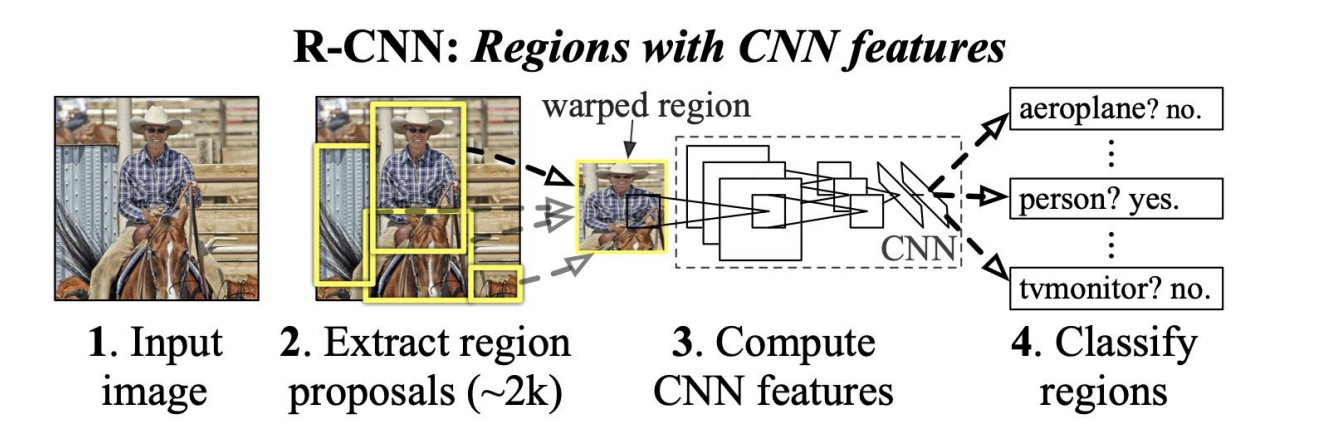

Работа модели делится на три основных этапа:
- (1) Выделение методом selective search 2000 регионов разных
размеров и форм, которые позже обрезаются или растягиваются/сжимаются в
изображения размером 227x227. Фиксированный размер изображения нужен,
потому что после сверточных слоев в архитектуре стоят полносвязные, а
ожидают они вектора фиксированного размера.
- (2) Далее эти изображения передаются в AlexNet - подобную
архитектуру, которая на выходе дает 4096-мерный вектор с выученными
признаками изображений.

- (3) Наконец, эти векторы проходят через N разных SVM (где N –
количество классов и каждая модель обучена на классификацию одного
класса). Для предсказания рамок области детекции обучали 4 линейные
регрессии (по одной для каждого целевого параметра: две координаты центра
рамки и два числа, отвечающие за ширину и высоту). У каждой такой модели
входные данные - векторы признаков изображения полученные после CNN и
параметры сгенерированной рамки, а целевые значения – это то, насколько
нужно изменить эти параметры (насколько сместить центр, и насколько
растянуть рамки по каждой оси). В итоге имеем 5 значений: предсказанный
класс и 4 значения того, насколько нужно изменить предложенный бокс.

### Итог:

**RCNN (Region-based Convolutional Neural Network)** — это один из первых подходов к задаче детекции объектов на изображениях, предложенный Россом Гиршем (Ross Girshick) и его коллегами в 2014 году. RCNN использует комбинацию классических методов компьютерного зрения и глубокого обучения для выполнения задачи детекции объектов. Основная идея RCNN заключается в том, чтобы сначала выделить потенциальные области, где могут находиться объекты, а затем классифицировать и уточнять их положение с помощью нейронной сети.

#### Основные этапы работы RCNN

RCNN выполняет детекцию в три основных шага:

1. **Выделение регионов (Region Proposal)**:
   - Используется классический метод **Selective Search** для выделения так называемых "региона интереса" (Region of Interest, RoI). Эти регионы представляют собой части изображения, которые могут содержать объекты. Selective Search генерирует около 2000 таких регионов для каждого изображения.
   - Эти регионы представляют собой потенциальные места расположения объектов, которые затем будут классифицированы и уточнены.

2. **Извлечение признаков (Feature Extraction)**:
   - Каждый из выделенных регионов изменяется до фиксированного размера и подается в сверточную нейронную сеть (CNN), которая извлекает признаки (features). Для этого этапа обычно используется предобученная модель, например **AlexNet** или **VGG**.
   - Извлечённые признаки представляют собой векторное представление региона и передаются на следующий этап.

3. **Классификация и регрессия рамок (Bounding Box Regression)**:
   - Извлечённые признаки передаются в классификатор (например, SVM), который определяет, к какому классу относится объект в данном регионе.
   - Также используется регрессор для уточнения координат рамки, чтобы предсказанная рамка более точно соответствовала объекту.

#### Преимущества RCNN:
- **Хорошая точность**: По сравнению с классическими методами, такими как использование методов детекции с помощью ручных признаков (HOG, SIFT), RCNN показала отличные результаты по точности на таких наборах данных, как PASCAL VOC.

#### Недостатки RCNN:
1. **Низкая скорость**:
   - RCNN очень медленная, так как необходимо прогонять каждый из регионов через CNN по отдельности (в среднем 2000 регионов на изображение). Это делает процесс крайне неэффективным для больших изображений или задач в реальном времени.
   
2. **Большие затраты по памяти**:
   - Для хранения признаков всех регионов требуются большие объемы памяти, что делает модель непрактичной для многих приложений.


#### Применение RCNN

Хотя из-за низкой скорости RCNN в своем оригинальном виде используется реже, она сыграла огромную роль в развитии области детекции объектов. Современные архитектуры, такие как **Faster R-CNN**, являются прямыми наследниками RCNN и используются в различных областях:
- **Автономные автомобили**: Для распознавания пешеходов, дорожных знаков, машин.
- **Видеоаналитика**: Для отслеживания объектов в видео в реальном времени.
- **Медицина**: Для детекции и локализации аномалий в медицинских изображениях.

Таким образом, RCNN — это базовая архитектура для детекции объектов, которая вдохновила разработку многих современных и более производительных моделей.

##### Вопросы:

1. Что такое сегментация данных?
2. Как работает RCNN?

### Region proposal algorithm


**Region Proposal Algorithm (алгоритм предложений регионов)** — это метод, используемый в задаче детекции объектов для нахождения потенциальных областей (регионов) изображения, где могут находиться объекты. Эти регионы или "предложения" являются кандидатами на дальнейшую обработку: классификацию и уточнение координат объектов. Алгоритмы предложений регионов применяются для уменьшения пространства поиска объектов на изображении, концентрируя внимание только на наиболее значимых участках.

### Как работает Region Proposal Algorithm?

Процесс выделения регионов можно объяснить так:
1. **Генерация регионов**: Алгоритм выделяет потенциальные области на изображении, которые, по его мнению, могут содержать объекты. Эти области называются "Region Proposals" (предложения регионов).
2. **Сжатие регионов**: Изображения каждого выделенного региона изменяются до одного размера, чтобы их можно было обработать сверточной нейронной сетью (CNN).
3. **Обработка CNN**: Эти регионы используются для извлечения признаков, которые затем могут быть переданы в классификатор, чтобы определить, содержат ли они объект и к какому классу он относится.

### Примеры алгоритмов предложений регионов

#### 1. **Selective Search**
Selective Search — это один из первых и наиболее популярных методов предложений регионов, который широко использовался в оригинальном алгоритме **RCNN**.
- Этот алгоритм основан на иерархической сегментации изображения. Он начинает с разделения изображения на несколько сегментов на основе цвета, текстуры и других характеристик, а затем объединяет похожие сегменты в более крупные области (регионы).
- В результате генерируется несколько тысяч регионов, которые затем обрабатываются нейросетью для определения наличия объекта.
  
##### Преимущества:
- Хорошо работает на изображениях с чёткими объектами и фоном.
- Легко реализовать.

##### Недостатки:
- **Медленный**: Selective Search требует значительных вычислительных ресурсов, особенно для больших изображений. Генерация регионов не оптимизирована для работы в реальном времени.
- Генерирует слишком много регионов (обычно около 2000 на одно изображение), что делает процесс детекции дорогим по времени и памяти.

#### 2. **EdgeBoxes**
EdgeBoxes — это другой популярный метод предложений регионов, который основан на идее использования информации о границах объектов на изображении.
- Алгоритм строит "коробки" (bounding boxes) вокруг объектов, основываясь на границах, которые он обнаруживает. Чем больше границ попадает внутрь коробки, тем выше вероятность, что эта область содержит объект.

##### Преимущества:
- Более быстрая генерация предложений регионов по сравнению с Selective Search.
- Меньшее количество ложных положительных регионов.

##### Недостатки:
- Меньшая точность по сравнению с некоторыми другими методами.

#### 3. **Region Proposal Network (RPN)**

**Region Proposal Network (RPN)** — это новаторский метод предложений регионов, который был предложен в архитектуре **Faster R-CNN** и является частью глубокой нейронной сети.
- **RPN** — это полностью сверточная сеть, которая обучается предлагать регионы на основе признаков, извлеченных из изображения с помощью CNN. Это позволяет интегрировать процесс предложений регионов с процессом детекции объектов в одну сеть, что делает обучение и выполнение гораздо быстрее по сравнению с традиционными методами, такими как Selective Search.
- Вместо использования внешнего алгоритма для генерации предложений регионов, RPN обучается вместе с основной моделью детекции, что значительно ускоряет процесс.

##### Преимущества:
- **Быстрота**: RPN работает намного быстрее по сравнению с методами, такими как Selective Search, поскольку региональные предложения делаются непосредственно внутри сети.
- **Оптимизация**: RPN можно обучать совместно с моделью детекции, что улучшает качество предложений и повышает точность модели.

##### Недостатки:
- **Сложность**: По сравнению с классическими методами, RPN более сложна в реализации и требует большей вычислительной мощности.


На заре развития алгоритма R-CNN в качестве алгоритма region proposal предлагалось брать алгоритм сегментации (не основанный на нейросетях). Этот алгоритм выдавал иерархическую структуру сегментации картинки. Region proposals формировались с каждого уровня иерархии
как box'ы, содержащие сегментированные объекты. Проиллюстрировать это можно примерно так:

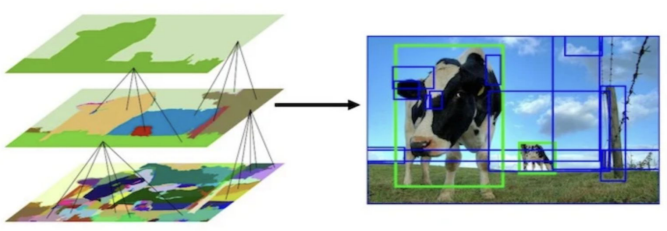

### Улучшения R-CNN

Этот алгоритм работал неплохо, но время его работы было довольно долгим. Поэтому на его основе были придуманы два улучшения: Fast R-CNN и Faster R-CNN.

**Fast R-CNN** — это усовершенствованная версия оригинального алгоритма **RCNN**, предназначенная для ускорения процесса детекции объектов. Она была предложена Россом Гиршем (Ross Girshick) в 2015 году. Основная идея Fast R-CNN заключается в том, чтобы сократить время обработки изображений и сделать модель более эффективной, особенно для работы с большими изображениями и множеством объектов.

#### Основные этапы работы Fast R-CNN

Fast R-CNN значительно оптимизирует процесс детекции по сравнению с RCNN за счёт следующих ключевых изменений:

1. **Обработка всего изображения одним проходом через CNN**:
   - В Fast R-CNN изображение обрабатывается **единожды** через сверточную нейронную сеть (CNN), чтобы извлечь все нужные признаки. Это контрастирует с оригинальной RCNN, где каждый потенциальный регион обрабатывался отдельной CNN, что было очень медленным и ресурсозатратным.
   - После того как признаки извлечены, они используются для классификации всех регионов интереса (RoIs).

2. **RoI Pooling (Pooling регионов интереса)**:
   - После того как CNN извлекает карту признаков (feature map) из всего изображения, используются предложенные регионы интереса (Region Proposals), которые делятся на сетку. Эти регионы соответствуют предложенным рамкам (bounding boxes) с возможными объектами.
   - Вместо обработки каждого региона через CNN, Fast R-CNN использует специальную операцию под названием **RoI Pooling**. Она позволяет выделить фиксированный размер признаков для каждого региона интереса, что позволяет обрабатывать их быстро и эффективно.
   
3. **Классификация и регрессия рамок (Bounding Box Regression)**:
   - После применения RoI Pooling признаки каждого региона передаются в полносвязные слои сети для классификации объектов.
   - Одновременно с этим модель уточняет координаты ограничивающих рамок (bounding boxes) через процесс регрессии рамок, улучшая точность локализации объектов.

#### Важные особенности Fast R-CNN

1. **Одновременная классификация и регрессия**:
   - В Fast R-CNN нейронная сеть одновременно выполняет задачу классификации (определение класса объекта) и задачу регрессии для уточнения положения рамок.
   - Это упрощает обучение модели и делает процесс детекции более быстрым и точным.

2. **Совместное обучение**:
   - Fast R-CNN использует единую сеть для извлечения признаков, классификации и регрессии рамок. Благодаря этому вся модель обучается совместно, что улучшает её производительность.

3. **Улучшенная эффективность**:
   - В RCNN каждый регион обрабатывался отдельно CNN, что требовало многократного прогонки сети. Fast R-CNN обрабатывает изображение один раз, извлекая общие признаки для всех регионов, что ускоряет процесс.

#### Преимущества Fast R-CNN

1. **Высокая скорость**:
   - Fast R-CNN работает значительно быстрее, чем RCNN, так как изображение обрабатывается один раз, а не многократно для каждого региона. Это позволяет сократить время на обработку изображений и значительно повысить эффективность.
   
2. **Точность**:
   - Модель Fast R-CNN показывает высокую точность при детекции объектов. Обучение и совместное использование извлечённых признаков для всех задач делает модель более точной и универсальной.
   
3. **Удобство обучения**:
   - Fast R-CNN легко обучается с использованием методов обратного распространения ошибки (backpropagation), поскольку все её компоненты интегрированы в единую архитектуру.

#### Недостатки Fast R-CNN

1. **Зависимость от предложений регионов**:
   - Несмотря на свои улучшения, Fast R-CNN по-прежнему полагается на внешние алгоритмы для генерации предложений регионов (такие как **Selective Search**). Этот этап по-прежнему является медленным и ограничивает производительность системы в реальном времени.
   
2. **Не подходит для реального времени**:
   - Хотя Fast R-CNN значительно быстрее оригинального RCNN, она всё ещё не подходит для приложений в реальном времени (например, для видеопотоков), так как выделение регионов остается относительно медленным.


**Faster R-CNN** — это усовершенствованная версия алгоритмов RCNN и Fast R-CNN, предназначенная для быстрого и точного обнаружения объектов на изображениях. Faster R-CNN, предложенный в 2015 году Россом Гиршем (Ross Girshick), решает проблему медленной генерации регионов интереса (Region Proposals), которая была слабым местом в предыдущих версиях RCNN. В Faster R-CNN используется специальная сеть, называемая **Region Proposal Network (RPN)**, для генерации регионов, что делает процесс детекции гораздо быстрее.

#### Основные этапы работы Faster R-CNN

Архитектура Faster R-CNN объединяет два ключевых компонента: **Region Proposal Network (RPN)** и **Fast R-CNN** для детекции объектов. Основные шаги работы алгоритма:

1. **Извлечение признаков с помощью CNN**:
   - Как и в Fast R-CNN, изображение проходит через сверточную нейронную сеть (например, **VGG16** или **ResNet**) для извлечения карты признаков (feature map).
   - Эти признаки представляют собой важные характеристики изображения, которые будут использоваться как для генерации регионов, так и для классификации объектов.

2. **Генерация предложений регионов с помощью RPN**:
   - Вместо использования внешнего алгоритма для предложений регионов (как в Fast R-CNN), Faster R-CNN использует **Region Proposal Network (RPN)**. Это специальная сеть, обученная предлагать потенциальные области изображения, где могут находиться объекты.
   - RPN принимает на вход карту признаков, извлечённую из изображения, и генерирует прямоугольные области (bounding boxes), которые могут содержать объекты.
   - Для каждой области RPN предсказывает вероятность того, что она содержит объект, и уточняет координаты рамки.

3. **RoI Pooling**:
   - После генерации предложений регионов с помощью RPN, для каждого региона применяется операция **RoI Pooling**, как и в Fast R-CNN.
   - RoI Pooling преобразует выделенные регионы интереса (Region of Interest) в фиксированный размер, чтобы их можно было эффективно обработать полносвязными слоями сети.

4. **Классификация и регрессия рамок**:
   - Признаки каждого региона после RoI Pooling передаются в полносвязные слои для предсказания:
     - **Класса объекта** (например, "кошка", "собака", "автомобиль").
     - **Уточнённых координат ограничивающей рамки** (bounding box regression) для более точной локализации объекта.
   
5. **Конечный вывод**:
   - На основе предсказанных классов и уточнённых координат рамок, модель возвращает результат с вероятностью нахождения объектов и их точным положением на изображении.

#### Ключевые особенности Faster R-CNN

1. **Region Proposal Network (RPN)**:
   - Самая важная инновация в Faster R-CNN — это использование RPN для генерации регионов. RPN — это полностью сверточная сеть, которая генерирует предложения регионов на основе карты признаков изображения.
   - RPN заменяет такие медленные методы, как Selective Search, и выполняет генерацию предложений в рамках одной сети, что значительно ускоряет процесс детекции.

2. **Совместное обучение**:
   - В Faster R-CNN RPN и основная сеть для классификации обучаются совместно. Это делает модель более точной и согласованной, поскольку оба компонента могут "научиться" лучше взаимодействовать друг с другом.

3. **Быстрота и точность**:
   - Faster R-CNN значительно быстрее своих предшественников (RCNN и Fast R-CNN), так как все операции выполняются в рамках одной сети.
   - Кроме того, благодаря обучению на множестве изображений, модель показывает высокую точность в детекции объектов.

#### Преимущества Faster R-CNN

1. **Высокая скорость**:
   - Благодаря использованию RPN для генерации предложений регионов, Faster R-CNN работает значительно быстрее, чем RCNN и Fast R-CNN, где использовались внешние алгоритмы для предложений регионов.
   - Это делает возможным использование Faster R-CNN в приложениях, где время обработки имеет большое значение (например, видеопотоки).

2. **Точность**:
   - Faster R-CNN демонстрирует высокую точность детекции объектов на сложных изображениях, так как предложения регионов и классификация обучаются совместно.
   
3. **Эффективность использования ресурсов**:
   - Использование одной сети для всех задач (генерация регионов, классификация и регрессия рамок) делает модель более эффективной и менее ресурсоёмкой по сравнению с более старыми подходами.

#### Недостатки Faster R-CNN

1. **Сложность в реальном времени**:
   - Несмотря на улучшения в скорости, Faster R-CNN всё ещё недостаточно быстра для многих приложений реального времени, таких как видеопотоки с высоким разрешением.
   - Для работы в реальном времени необходимы более лёгкие и быстрые модели, такие как **YOLO** или **SSD**, которые имеют меньшие задержки.

2. **Сложность реализации**:
   - Faster R-CNN сложнее в реализации и требует больше вычислительных ресурсов для обучения по сравнению с более простыми архитектурами.


#### Применение Faster R-CNN

Faster R-CNN активно используется в различных задачах компьютерного зрения, таких как:
- **Автономные автомобили**: Для распознавания объектов на дороге (например, пешеходов, транспортных средств).
- **Видеонаблюдение**: Для отслеживания объектов, таких как люди или транспортные средства, в реальном времени.
- **Медицинская диагностика**: Для детекции аномалий в медицинских изображениях (например, обнаружение опухолей на МРТ-снимках).
- **Робототехника**: Для детекции и локализации объектов в окружающей среде роботов.


#### Вывод. Плюсы и минусы моделей

**R-CNN** (2014):

Плюсы:

* Высокая точность: Обеспечивает хорошую точность обнаружения объектов, так как использует мощные свёрточные нейронные сети для извлечения признаков.

* Идея регионов интереса: Введение предложений регионов (RoI) стало важной инновацией для задачи детекции объектов, что улучшило производительность по сравнению с традиционными методами.

Минусы:

* Медлительность: Очень медленная модель, так как каждый регион интереса обрабатывается отдельно, что увеличивает время вычислений.
* Многократная свёртка: Для каждого региона требуется отдельный прогон через свёрточную сеть, что делает модель неэффективной в вычислительном плане.
* Многоэтапный процесс: Обучение и выполнение детекции — это сложный многоэтапный процесс, включающий извлечение регионов, извлечение признаков и последующую классификацию.



**Fast R-CNN** (2015):

Плюсы:

* Более высокая скорость: Применение CNN ко всему изображению сразу и использование RoI Pooling для регионов делает модель значительно быстрее, чем оригинальная R-CNN.
* Объединённое обучение: Обучение на основе единой целевой функции для классификации и регрессии координат ограничивающей рамки.
* Меньше ресурсов: Меньше вычислительных затрат по сравнению с R-CNN, так как свёрточная сеть используется только один раз для всего изображения.

Минусы:

* Зависимость от регионов предложений: Хотя Fast R-CNN быстрее, она всё ещё полагается на медленный процесс генерации регионов с помощью селективного поиска, что замедляет общую производительность.


**Faster R-CNN** (2015):

Плюсы:

* Очень высокая скорость: Введение Region Proposal Network (RPN) для генерации предложений регионов непосредственно из карт признаков значительно ускоряет процесс. Процесс стал энд-то-энд обучаемым.
* Эффективность: Одновременное обучение классификации и генерации предложений регионов, что делает модель более эффективной и согласованной.
* Гибкость: Модель может быть использована для различных задач детекции, включая детекцию мелких объектов.

Минусы:
* Трудоёмкость настройки: Включение RPN делает архитектуру сложнее, что требует больше усилий для правильной настройки и оптимизации.
* Больше памяти: Потребность в большем количестве вычислительных ресурсов, включая память GPU, особенно при обработке изображений высокого разрешения.

## YOLO

Несмотря на все улучшения, алгоритмы детекции на основе идеи R-CNN все равно оказались довольно долгими. Долгое время работы получается в основном за счет того, что нужно много раз запускать сеть для классификации (один раз для каждого предполагаемого bounding box'а). Для real-time детекции они явно не подходили. Поэтому была придумана другая идея нейросети для детекции: YOLO ("You Only Look Once"). Нейросети на основе YOLO используются для real-time детекции и по сей день.

Главная фишка YOLO — она требует только одного прогона нейросети для детекции всех объектов на картинке.

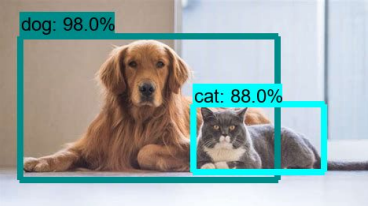

### Идея YOLO

Идея работы YOLO:

1. Исходная картинка разбивается на пачти
фиксированного размера. Всего SxS патчей.

2. Картинка подается на вход нейросети. Задача этой нейросети — для каждого из SxS патчей выдать b предполагаемых bounding box'ов. И для каждого bounding box'а выдать его координаты [x1, y1], [x2,y2] и confidence (уверенность) в том, что этот bounding box верный. Кроме этого, сеть для каждого патча должна выдать класс объекта, который находится в этом патче.

3. Из всех bounding box'ов остаются только те, для которых confidence выше некоторого порога. Это и есть итоговый результат.

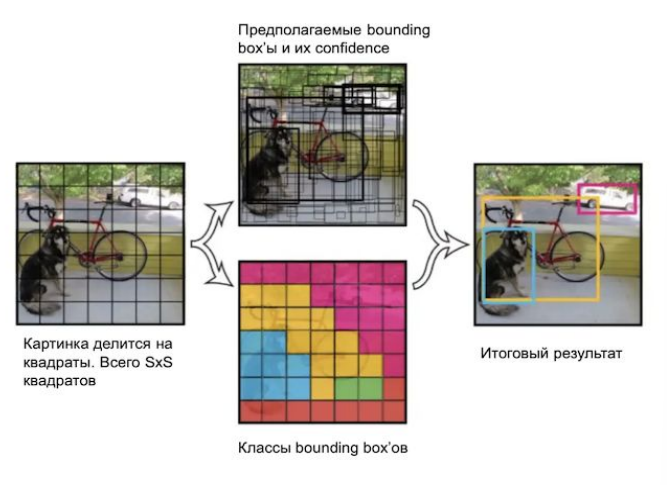



#### Ключевые особенности YOLO

Основное отличие YOLO от других алгоритмов детекции объектов, таких как **RCNN** и **Faster R-CNN**, заключается в том, что YOLO рассматривает задачу детекции объектов как **задачу регрессии**. В отличие от традиционных методов, где отдельные части изображения сначала анализируются на наличие объектов (как это происходит в RCNN), YOLO обрабатывает **всё изображение** за **один проход** через сеть, что делает его очень быстрым.

#### Как работает YOLO?

YOLO использует единый свёрточный нейронный подход, чтобы предсказать одновременно как ограничивающие рамки (bounding boxes), так и классы объектов на изображении. Основные этапы работы YOLO:

1. **Разбиение изображения на сетку**:
   - Изображение делится на **сетку размером S×S**. Каждый элемент сетки отвечает за предсказание объектов, которые находятся в пределах этого элемента.
   
2. **Прогнозирование bounding boxes и классов**:
   - Для каждого элемента сетки модель предсказывает определённое количество ограничивающих рамок (bounding boxes). Каждая рамка характеризуется следующими параметрами:
     - **Координаты центра рамки** (x, y).
     - **Ширина и высота рамки**.
     - **Уверенность** (confidence), которая указывает, насколько модель уверена в том, что рамка содержит объект.
   
   - Также для каждого элемента сетки предсказываются классы объектов (например, "собака", "машина").

3. **Единовременное предсказание для всех объектов**:
   - В отличие от методов, которые генерируют предложения регионов (Region Proposals) и классифицируют их по отдельности, YOLO предсказывает рамки и классы объектов **одновременно** для всех элементов сетки. Это и позволяет достигать высокой скорости работы.
   
4. **Фильтрация предсказаний**:
   - После того как модель сделала множество предсказаний, используется метод, называемый **Non-Maximum Suppression (NMS)**, чтобы отфильтровать лишние рамки и оставить только те, которые наиболее вероятно содержат объекты.
   - Это позволяет избежать дублирующихся предсказаний для одного и того же объекта.

#### Архитектура YOLO

Архитектура YOLO основана на сверточной нейронной сети (CNN), которая состоит из нескольких свёрточных слоёв и полносвязных слоёв. Основные компоненты:

- **Сверточные слои**: Используются для извлечения признаков из входного изображения. Эти признаки помогают модели понимать контекст и местоположение объектов.
- **Полносвязные слои**: Используются для предсказания координат ограничивающих рамок, уверенности (confidence) и классов объектов.

#### Версии YOLO

Алгоритм YOLO прошел несколько итераций и улучшений с момента своего появления. Основные версии YOLO:

1. **YOLOv1 (2015)**:
   - Первая версия YOLO, предложенная в 2015 году. В этой версии сеть делит изображение на сетку размером 7×7 и предсказывает до 98 рамок.
   - YOLOv1 была значительно быстрее, чем другие алгоритмы (например, Faster R-CNN), но уступала в точности на сложных изображениях с мелкими объектами.

2. **YOLOv2 (2016)** или **YOLO9000**:
   - Вторая версия YOLO, улучшенная в плане точности и масштабируемости. Она поддерживает детекцию **до 9000 классов объектов** (отсюда название YOLO9000).
   - YOLOv2 использует улучшенные методы предсказания рамок, такие как **Anchor Boxes**, и более сложные сверточные сети (например, Darknet-19), что делает модель более точной.

3. **YOLOv3 (2018)**:
   - В YOLOv3 были введены улучшенные механизмы для детекции объектов разного размера (использование нескольких масштабов предсказаний).
   - Также были введены более точные механизмы классификации объектов и улучшены подходы к регрессии рамок.

4. **YOLOv4 (2020)**:
   - В этой версии акцент был сделан на увеличении производительности без значительных потерь в точности. YOLOv4 использует методы улучшения обучения, такие как **Mosaic Data Augmentation** и **CSPNet** для ускорения работы.

5. **YOLOv5 (2020)**:
   - YOLOv5 — это ещё более оптимизированная версия, которая привнесла новые улучшения в плане лёгкости и простоты использования (модель легче обучать и внедрять).
   - Хотя YOLOv5 не был предложен самим Джозефом Редмоном, он стал популярен благодаря своей высокой производительности и простоте использования.

6. **YOLOv7 (2022)**:
   - Одна из последних версий YOLO, которая улучшила как точность, так и скорость, делая YOLO одной из самых быстрых моделей для детекции объектов, с улучшенной обработкой объектов разного размера.

#### Преимущества YOLO

1. **Скорость**:
   - Основное преимущество YOLO — это скорость. YOLO может обрабатывать изображения практически в реальном времени, что делает его идеальным для приложений, требующих высокой скорости, таких как видеонаблюдение, автономные автомобили и дроны.
   
2. **Одновременное предсказание**:
   - YOLO предсказывает все bounding boxes и классы объектов за один проход через сеть, что позволяет значительно сократить время обработки по сравнению с моделями, такими как RCNN и Faster R-CNN, где рамки сначала генерируются, а потом классифицируются.

3. **Обработка всех объектов на изображении**:
   - YOLO обрабатывает всё изображение сразу, что позволяет ей лучше учитывать контекст объекта в сцене. Это делает YOLO хорошим выбором для детекции объектов в сложных сценах.

#### Недостатки YOLO

1. **Проблемы с мелкими объектами**:
   - YOLO может испытывать трудности при детекции очень мелких объектов, особенно если они занимают небольшие области на изображении. Это связано с тем, что изображение делится на крупные сетки, и мелкие объекты могут не попасть в нужные ячейки.

2. **Низкая точность по сравнению с более сложными моделями**:
   - Несмотря на свою скорость, YOLO может уступать в точности другим, более медленным моделям, таким как Faster R-CNN, особенно на сложных изображениях с большим количеством мелких объектов или сильно перекрывающимися объектами.

#### Применение YOLO

YOLO применяется в самых различных областях, где требуется быстрая и эффективная детекция объектов:

- **Автономные системы**: Для распознавания пешеходов, автомобилей и других объектов на дороге в реальном времени.
- **Системы видеонаблюдения**: Для мониторинга и отслеживания объектов (людей, транспортных средств) на видео.
- **Дроны**: Для обнаружения объектов с камер, установленных на летательных аппаратах.
- **Робототехника**: Для детекции объектов в окружающей среде робота.
- **Медицина**: Используется для быстрой обработки медицинских изображений и детекции патологий.


##### Вопросы:

1. Что такое YOLO?
2. Как работает YOLO?

## ПРАКТИКА


Скачать необходимые данные:

 https://drive.google.com/drive/folders/1WY44hdrDYXvLxvsQfO6Iw_VMq-YDVPBW?usp=sharing

In [ ]:
import numpy as np  # Импорт библиотеки NumPy для работы с массивами
import cv2  # Импорт библиотеки OpenCV для компьютерного зрения
import matplotlib.pyplot as plt  # Импорт библиотеки matplotlib для построения графиков
import time  # Импорт модуля time для работы со временем

import warnings  # Импортируем модуль для работы с предупреждениями

# Игнорируем предупреждения для того, чтобы они не отображались в выводе
warnings.filterwarnings('ignore')

# Подключаем Google Drive
from google.colab import drive  # Импортируем модуль для работы с Google Drive в Google Colab
drive.mount('/content/drive')  # Монтируем Google Drive к директории '/content/drive'

Mounted at /content/drive


## Датасет COCO (Common Objects in Context)

**COCO** — это крупномасштабный датасет для задач компьютерного зрения, который включает:
- **330,000+ изображений**
- **Более 1,5 миллиона объектов**
- **80 категорий объектов**

### Основные возможности:
- **Обнаружение объектов**: предоставляет ограничивающие рамки для объектов.
- **Сегментация**: маски для точных границ объектов.
- **Обнаружение ключевых точек**: оценка поз человека с помощью ключевых точек.
- **Сегментация фона**: понимание контекста фона (например, небо, дорога).

COCO используется для классификации изображений, обнаружения объектов и сегментации, являясь ключевым элементом в соревнованиях, таких как **MS COCO Challenge**.


In [ ]:
# Загружаем файл с метками классов объектов COCO
labels = open('drive/MyDrive/coco.names').read().strip().split('\n')  # Открываем файл с метками, считываем содержимое, удаляем лишние пробелы и
#  разделяем строки на отдельные элементы списка
labels  # Выводим список меток классов для дальнейшего использования

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [ ]:
# Указываем пути к весам и конфигурации для YOLO
weights_path = 'drive/MyDrive/yolov3.weights'  # Путь к файлу с предобученными весами модели YOLO
configuration_path = 'drive/MyDrive/yolov3.cfg'  # Путь к файлу конфигурации модели YOLO

# Минимальная вероятность (уверенность) для обнаруженных объектов
probability_minimum = 0.5  # Минимальная вероятность (доверие), при которой объект будет считаться распознанным

# Параметр NMS (Non-Maximum Suppression)
threshold = 0.3  # Порог для подавления слабых, перекрывающихся предсказаний, чтобы уменьшить количество ложных срабатываний


NMS (Non-Maximum Suppression) — это метод, используемый для фильтрации предсказанных bounding box'ов при детекции объектов. Когда нейросеть, такая как YOLO, предсказывает множество объектов, она может выдать несколько пересекающихся рамок для одного объекта. NMS помогает убрать лишние дублирующиеся рамки, оставив только ту, которая имеет наибольшую вероятность.

In [ ]:
# Загружаем нейросеть YOLO с использованием весов и конфигурации
network = cv2.dnn.readNet(configuration_path, weights_path)  # Загружаем предобученную модель YOLO с указанными конфигурацией и весами

# Получаем имена всех слоев сети YOLO
layers_names_all = network.getLayerNames()  # Извлекаем список всех имен слоев в загруженной нейросети


In [ ]:
# Список выходных слоев
layers_names_output = [layers_names_all[i - 1] for i in network.getUnconnectedOutLayers()]
# Извлекаем индексы выходных слоев, затем используем эти индексы для получения имен этих слоев
# Индексы слоев в OpenCV начинаются с 1, поэтому мы вычитаем 1, чтобы они соответствовали нумерации Python (с 0)

layers_names_output  # Выводим список имен выходных слоев


['yolo_82', 'yolo_94', 'yolo_106']

In [ ]:
# Загружаем изображение с использованием OpenCV
image_input = cv2.imread('drive/MyDrive/images/horse.jpg')  # Загружаем изображение из файла по указанному пути

# Получаем размеры входного изображения
image_input_shape = image_input.shape  # Извлекаем форму (размеры) изображения: высота, ширина и количество цветовых каналов (например, 3 для RGB)
image_input_shape  # Выводим форму изображения


(1080, 1920, 3)

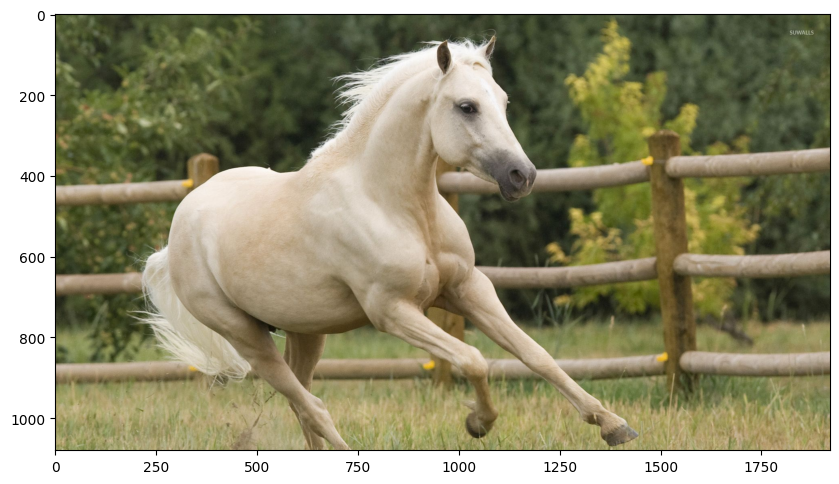

In [ ]:
# Настраиваем размеры фигуры (окна) для отображения изображения
plt.rcParams['figure.figsize'] = (10.0, 10.0)  # Устанавливаем размеры окна для отображения графиков или изображений (10x10 дюймов)

# Отображаем изображение с помощью Matplotlib
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))  # Преобразуем изображение из формата BGR (используемого в OpenCV) в RGB (для корректного отображения в Matplotlib) и выводим его

# Показываем изображение
plt.show()  # Выводим изображение на экран


In [ ]:
# Преобразуем изображение в "blob", чтобы его можно было обработать с помощью YOLO
# blobFromImage масштабирует изображение, нормализует его и изменяет размер
blob = cv2.dnn.blobFromImage(image_input, 1 / 255.0, (416, 416), swapRB=True, crop=False)
# Преобразуем изображение в формат "blob" для нейросетевой обработки
# Масштабируем значения пикселей (нормализуем от 0 до 1), изменяем размер до 416x416
# swapRB=True меняет порядок цветовых каналов с BGR на RGB (порядок, требуемый YOLO)
# crop=False указывает не обрезать изображение при изменении размера

# Проверка формы исходного изображения и преобразованного blob
print(image_input.shape)  # Выводим форму исходного изображения (высота, ширина, количество каналов)
print(blob.shape)  # Выводим форму преобразованного "blob" (количество изображений, количество каналов, ширина, высота)
# (количество изображений, каналы, ширина, высота)


(1080, 1920, 3)
(1, 3, 416, 416)


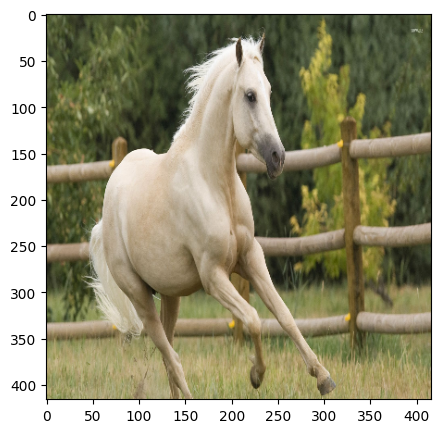

In [ ]:
# Отображение преобразованного blob для проверки
blob_to_show = blob[0, :, :, :].transpose(1, 2, 0)
# Извлекаем первое изображение из blob и меняем местами оси, чтобы привести изображение к стандартному формату (высота, ширина, каналы)
# Изначально оси blob: (количество изображений, каналы, высота, ширина), после transpose будет (высота, ширина, каналы)

# Настраиваем размеры окна для отображения изображения
plt.rcParams['figure.figsize'] = (5.0, 5.0)  # Устанавливаем размеры окна для вывода изображения 5x5 дюймов

# Отображаем преобразованное изображение
plt.imshow(blob_to_show)  # Выводим изображение в формате RGB
plt.show()  # Показываем изображение на экране


In [ ]:
# Устанавливаем blob как входной параметр для нейросети YOLO
network.setInput(blob)  # Устанавливаем преобразованное изображение ("blob") в качестве входных данных для нейросети

# Запускаем прямой проход по сети для получения предсказаний
start = time.time()  # Сохраняем текущее время до начала выполнения
output_from_network = network.forward(layers_names_output)  # Запускаем прямой проход по сети и получаем предсказания с выходных слоев
end = time.time()  # Сохраняем время после завершения выполнения

# Выводим, сколько времени занял прямой проход по сети YOLO
print('YOLO v3 took {:.5f} seconds'.format(end - start))  # Выводим время выполнения в секундах с точностью до 5 знаков после запятой


YOLO v3 took 1.13103 seconds


In [ ]:
# Генерируем цвета для рисования bounding box'ов
np.random.seed(42)  # Устанавливаем фиксированное значение для генератора случайных чисел, чтобы результаты были воспроизводимыми
# Генерируем случайные цвета для каждого класса объектов
colours = np.random.randint(0, 255, size=(len(labels), 3), dtype='uint8')
# Создаем массив случайных цветов (значения от 0 до 255) для каждого класса, состоящий из 3 компонентов (RGB)
# size=(len(labels), 3) определяет размерность массива: количество классов (меток) x 3 (канала цвета)


In [ ]:
# Инициализируем списки для хранения обнаруженных объектов
bounding_boxes = []  # Список для хранения координат ограничивающих рамок (bounding boxes) для обнаруженных объектов
confidences = []  # Список для хранения значений уверенности (confidence scores) для каждого обнаруженного объекта
class_numbers = []  # Список для хранения номеров классов (или меток) для каждого обнаруженного объекта


In [ ]:
# Извлекаем высоту и ширину исходного изображения
h, w = image_input_shape[:2]

In [ ]:
# Проходим по каждому результату детекции
for result in output_from_network:
    for detection in result:
        # Вычисляем уверенность предсказания
        scores = detection[5:]  # Извлекаем вероятности классов (после первых 5 элементов: x_center, y_center, width, height, и confidence)
        class_current = np.argmax(scores)  # Находим индекс класса с максимальной вероятностью
        confidence_current = scores[class_current]  # Получаем значение уверенности для этого класса

        # Фильтруем слабые предсказания на основе минимальной уверенности
        if confidence_current > probability_minimum:  # Проверяем, превышает ли уверенность заданный порог
            # Масштабируем координаты bounding box до размеров изображения
            box_current = detection[0:4] * np.array([w, h, w, h])  # Умножаем на размеры изображения для получения фактических координат

            # Вычисляем координаты верхнего левого угла
            x_center, y_center, box_width, box_height = box_current.astype('int')  # Приводим координаты к целым числам
            x_min = int(x_center - (box_width / 2))  # Вычисляем координату x верхнего левого угла
            y_min = int(y_center - (box_height / 2))  # Вычисляем координату y верхнего левого угла

            # Сохраняем найденные bounding box, уверенность и номер класса
            bounding_boxes.append([x_min, y_min, int(box_width), int(box_height)])  # Сохраняем координаты и размеры bounding box
            confidences.append(float(confidence_current))  # Сохраняем уверенность
            class_numbers.append(class_current)  # Сохраняем номер класса


In [ ]:
# Применяем метод NMS (Non-Maximum Suppression) для удаления дублирующихся детекций
results = cv2.dnn.NMSBoxes(bounding_boxes, confidences, probability_minimum, threshold)
# Вызываем функцию NMSBoxes для фильтрации ограничивающих рамок, используя списки bounding_boxes и confidences
# probability_minimum — это порог для уверенности, а threshold — порог для подавления пересекающихся рамок

# Выводим найденные метки классов на экран
for i in range(len(class_numbers)):
    print(labels[int(class_numbers[i])])  # Для каждого обнаруженного объекта выводим его метку класса

# Сохраняем найденные метки классов в файл
with open('found_labels.txt', 'w') as f:  # Открываем файл для записи
    for i in range(len(class_numbers)):
        f.write(labels[int(class_numbers[i])])  # Записываем метку класса для каждого обнаруженного объекта


horse
horse
horse
horse
horse
horse
horse


In [ ]:
# Если обнаружен хотя бы один объект
if len(results) > 0:  # Проверяем, есть ли результаты после применения NMS
    for i in results.flatten():  # Проходим по всем индексам оставшихся объектов
        # Извлекаем координаты и размеры bounding box
        x_min, y_min = bounding_boxes[i][0], bounding_boxes[i][1]  # Получаем верхний левый угол ограничивающей рамки
        box_width, box_height = bounding_boxes[i][2], bounding_boxes[i][3]  # Получаем ширину и высоту ограничивающей рамки

        colour_box_current = [int(j) for j in colours[class_numbers[i]]]  # Извлекаем цвет для текущей рамки по номеру класса

        # Рисуем ограничивающую рамку на изображении
        cv2.rectangle(image_input, (x_min, y_min), (x_min + box_width, y_min + box_height),
                      colour_box_current, 5)  # Рисуем прямоугольник с заданными координатами и цветом

        # Формируем текст для отображения класса и уверенности
        text_box_current = '{}: {:.4f}'.format(labels[int(class_numbers[i])], confidences[i])
        # Создаем текст с названием класса и значением уверенности (формат: "класс: уверенность")

        # Добавляем текст на изображение
        cv2.putText(image_input, text_box_current, (x_min, y_min - 7), cv2.FONT_HERSHEY_SIMPLEX,
                    1.5, colour_box_current, 5)  # Размещаем текст над ограничивающей рамкой


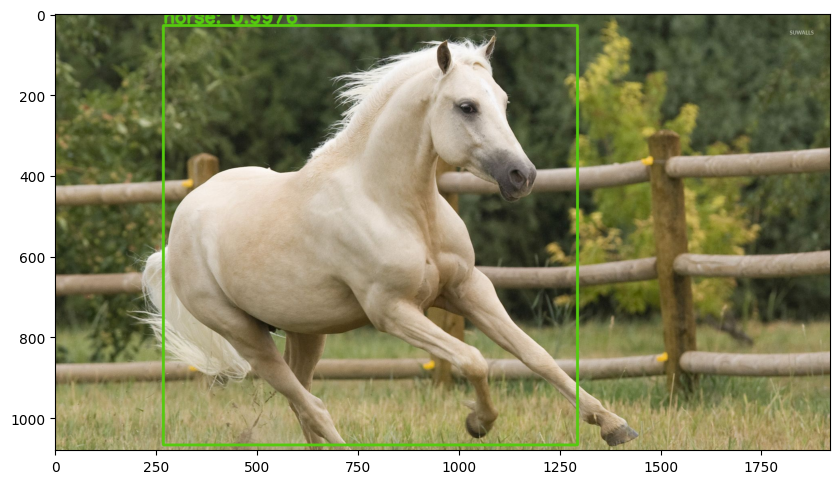

In [ ]:
# Настраиваем размеры фигуры (окна) для отображения изображения
plt.rcParams['figure.figsize'] = (10.0, 10.0)  # Устанавливаем размеры окна для отображения графиков или изображений (10x10 дюймов)

# Отображаем изображение с нарисованными bounding box'ами и текстом
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))  # Преобразуем изображение из формата BGR (используемого в OpenCV) в RGB (для корректного отображения в Matplotlib) и выводим его

# Показываем изображение
plt.show()  # Выводим изображение на экран


## OPENCV + YOLO (Video)

In [ ]:
import cv2  # Импортируем библиотеку OpenCV для работы с изображениями и видео
import numpy as np  # Импортируем NumPy для работы с массивами
import time  # Импортируем time для работы с временем (в данном коде не используется)
from google.colab.patches import cv2_imshow  # Импортируем функцию для отображения изображений в Google Colab

# Загружаем YOLO файлы: веса и конфигурацию
net = cv2.dnn.readNet("drive/MyDrive/yolov3.weights", "drive/MyDrive/yolov3.cfg")  # Загружаем веса и конфигурацию модели YOLO


# Инициализируем список классов
classes = []
with open("drive/MyDrive/coco.names", "r") as f:  # Открываем файл с именами классов
    classes = f.read().strip().split("\n")  # Читаем имена классов и сохраняем в список

# Загружаем видео
video_path = "drive/MyDrive/video.mp4"  # Указываем путь к видеофайлу
cap = cv2.VideoCapture(video_path)  # Создаем объект для захвата видео

# Переменные для извлечения кадров
frame_rate = 60  # Устанавливаем частоту извлечения кадров (60 кадров)
frame_count = 0  # Счетчик кадров

while True:  # Запускаем бесконечный цикл для обработки видео
    ret, frame = cap.read()  # Читаем кадр из видео
    if not ret:  # Если кадр не был успешно считан, выходим из цикла
        break

    frame_count += 1  # Увеличиваем счетчик кадров
    # Обрабатываем каждый 60-й кадр
    if frame_count % frame_rate == 0:  # Проверяем, является ли текущий кадр 60-м

        # Преобразуем изображение в формат, который может обработать YOLO
        # - frame: входной кадр
        # - 0.00392: коэффициент масштабирования (1/255)
        # - (416, 416): размер кадра для обработки
        # - (0, 0, 0): значения для вычитания среднего
        # - True: изменение порядка каналов (OpenCV использует BGR)
        # - crop=False: не обрезать изображение

        blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
        # Устанавливаем "blob" как входные данные для нейросети
        net.setInput(blob)
        # Проходим через сеть для получения обнаружений
        outs = net.forward(net.getUnconnectedOutLayersNames())  # Получаем результаты обнаружения

        # Обрабатываем вывод YOLO
        for out in outs:  # Проходим по каждому выходному слою
            for detection in out:  # Проходим по каждому обнаружению
                scores = detection[5:]  # Извлекаем вероятности классов
                class_id = np.argmax(scores)  # Находим индекс класса с максимальной вероятностью
                confidence = scores[class_id]  # Получаем значение уверенности для этого класса

                if confidence > 0.5: # Проверяем, превышает ли уверенность пороговое значение 0.5
                    # Вычисляем координаты центра ограничивающей рамки
                    center_x = int(detection[0] * frame.shape[1])  # X-координата центра (масштабируется относительно ширины кадра)
                    center_y = int(detection[1] * frame.shape[0])  # Y-координата центра (масштабируется относительно высоты кадра)
                    width = int(detection[2] * frame.shape[1])  # Ширина ограничивающей рамки (масштабируется относительно ширины кадра)
                    height = int(detection[3] * frame.shape[0])  # Высота ограничивающей рамки (масштабируется относительно высоты кадра)

                    # Вычисляем координаты верхнего левого угла ограничивающей рамки
                    x = int(center_x - width / 2)  # X-координата верхнего левого угла
                    y = int(center_y - height / 2)  # Y-координата верхнего левого угла

                    # Рисуем прямоугольник на кадре для обозначения обнаруженного объекта
                    cv2.rectangle(frame, (x, y), (x + width, y + height), (0, 255, 0), 2)  # Рисуем зеленый прямоугольник

                    # Формируем текст для отображения класса и уверенности
                    label = f"{classes[class_id]}: {confidence:.2f}"  # Создаем строку с классом и уверенность (с округлением до двух знаков после запятой)

                    # Добавляем текст на изображение
                    cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
                    # Размещаем текст немного выше ограничивающей рамки, используя шрифт и цвет, аналогичные прямоугольнику

        # Отображаем текущий обработанный кадр
        cv2_imshow(frame)  # Выводим изображение с рисованными прямоугольниками и текстом

        # Ждем нажатия клавиши перед переходом к следующему кадру
        # cv2.waitKey(0)  # Ожидаем, пока пользователь не нажмет клавишу для продолжения (можно изменить для автоматического отображения)

# Освобождаем ресурсы после завершения обработки видео
cap.release()  # Освобождаем объект VideoCapture
cv2.destroyAllWindows()  # Закрываем все открытые окна, связанные с OpenCV

## Домашнее задание

> Теория по этому дз в следующей лекции

**Цель**: Разработать классификатор для определения спам/не с пам сообщений с использованием различных методов предобработки текста и векторизации.

**Задания**:
1. Подготовкаданных:
    Загрузите датасет SMS сообщений,размеченных как спамилинеспам. https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

2. Предобработка текста: Реализуйте лемматизацию или стемминг для текстов сообщений.
3. Векторизация текста: Примените мешок слов(BagofWords)и TF-IDF для векторизации текста.
4. Моделирование: Постройте модели для классификации сообщений как спам или неспам(модели на ваш выбор).
5. Оцените качество моделей с различными комбинациями предобработкии векторизации(сравните ROC-AUC,F1-score,accuracyит.д.).

# Промежуточная аттестация по сетям искусcтвенных нейронов 3.
## Задание

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 * в оттенках серого *. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**

Описание классов

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    




```
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
```

1. Визаулизация датасета
2. Предобработка
3. Создайте модель
4. Тренировка модели
5. Оценка модели
6. Обязательно нужны выводы!

